In [1]:
import opt_mo
import axelrod as axl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import sympy as sym

In [4]:
sym.init_printing()

In [5]:
import itertools

In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
solutions = []
for i in range(40):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]
    
    solution_set = opt_mo.reactive_set(opponents)
    solutions.append(opt_mo.argmax(opponents, solution_set))

**Visualise**

In [9]:
def plot_argmax(opponents, solution, filename):
    p_1, p_2 = sym.symbols('p_1, p_2')
    p = (p_1, p_2, p_1, p_2)
    
    p_one, p_two = np.linspace(0, 1, 50), np.linspace(0, 1, 50)
    utility = -opt_mo.tournament_utility(p, opponents)
    
    expr = sym.lambdify((p_1, p_2), utility.simplify())
    
    plt.figure()
    X, Y = np.meshgrid(p_one, p_two)
    Z = expr(X, Y)
    
    plt.contourf(X, Y, Z);
    plt.colorbar();
    plt.plot(solution[0], solution[1], marker='x', color='r', markersize=20, markeredgewidth=5)
    plt.ylabel(r'$p_2$')
    plt.xlabel(r'$p_1$')
    plt.tight_layout()
    # plt.savefig(filename);

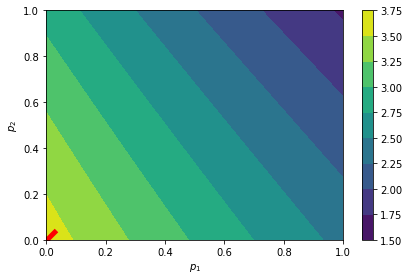

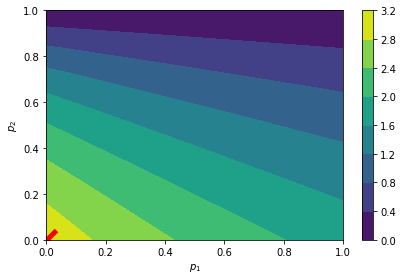

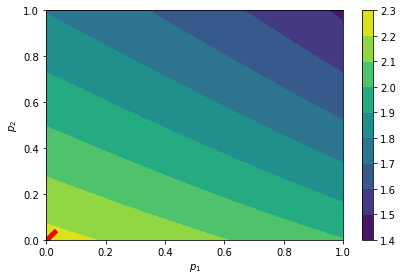

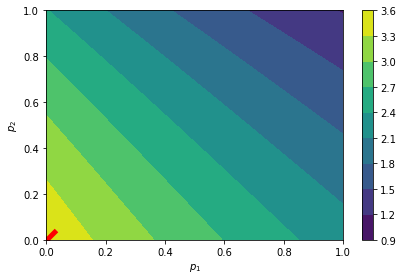

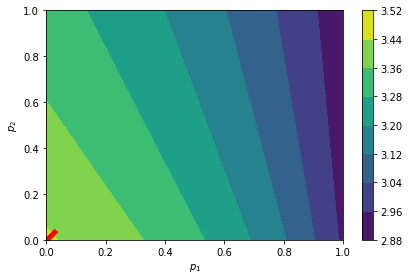

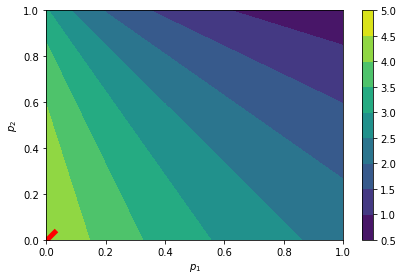

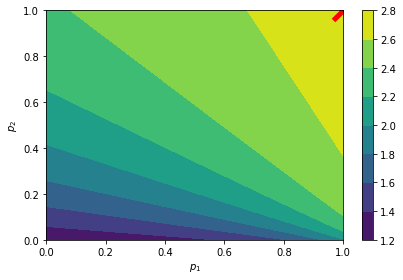

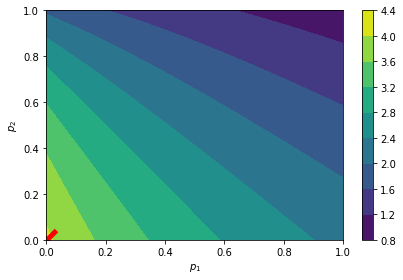

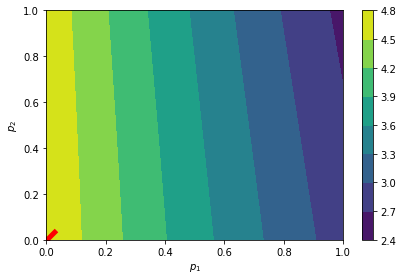

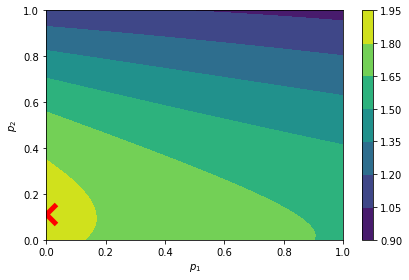

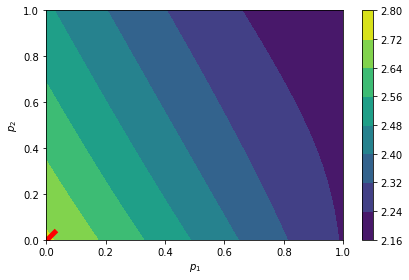

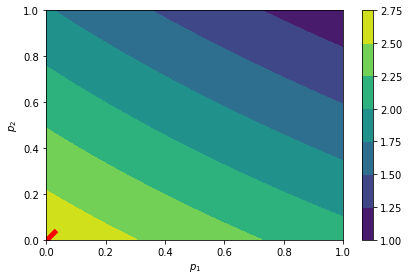

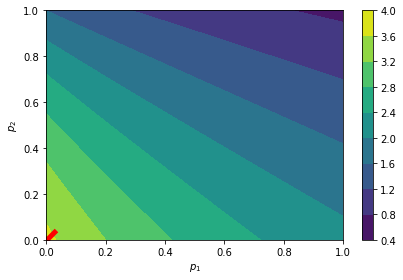

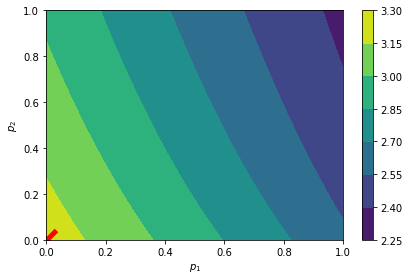

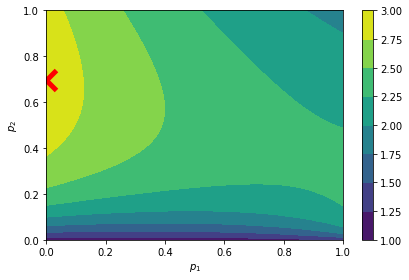

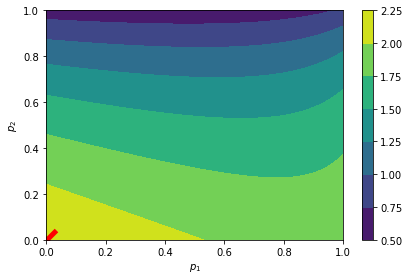

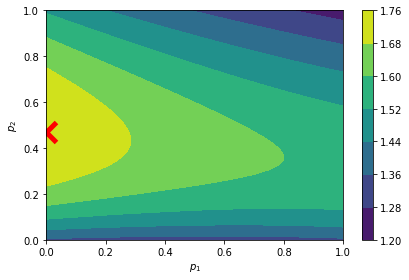

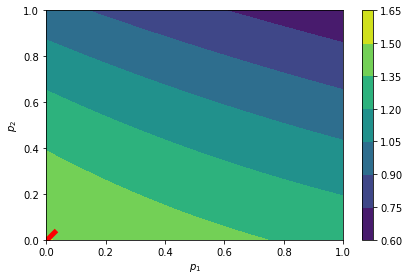

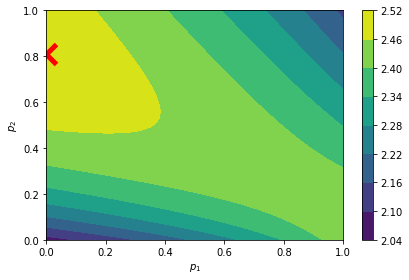

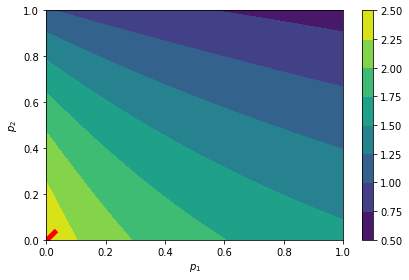

In [10]:
for i in range(20):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]
    
    plot_argmax(opponents, solutions[i], '../img/reactive/reactive_pairwise_{}.pdf'.format(i))